<a href="https://colab.research.google.com/github/Ay1932/Machine-Learning/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project title: Customer Churn predition**

**Introdution**

**Question: Why do chustomers churn(stop using service)?**

Customer stop using the service of the company beacause either they don't want to use sevice or they find better servie which is provided by another company.Understanding why customer churn happen and how this models helps to analyze busineeses retain them by improving their service.







**Major factors are affect for customer churn**

**1. Contract type:** Contract type can be either month-to-month or 1 or 2 years contract. In month-to-month contract customer can cancel the service in anytime of the month,starting or ending of month but in 1 or 2 years contract customer is long term commited with the service which are provided by company.

**2. Monthly charges:** Customer who pays more charges for service it means higher chance to churn or they will look for another company services which are cheaper than they that pay currently for service.

**3. Internet service type:** It also depends on internet service type either cutomers use DSL or Fibar optical. Those who use fibar optical churn more than DSL service. Customer stop using fibar optic because of it costs more and service quality issues. These problems lead to customer dissatisfaction.

**4. Poor customer support:** Company who don't have a customer support team or weak team it also lead to churn because users may face service issues and don't get proper assistance from company that leads to frustration.

**5. Payment methods:** The main reason of customer churn is the payment method because mostly payment methods are electronic and these are auto-pays method. Electronic check users might be less-commited or more price-sensitive.

**6. Paperless billing:** User stop service whose get paperless billing more than those with printed bills. In paperless billing user pay less attention to the billing of service or might be they not engage with the service regularly and still pays for service.

**7. Tenture:** Users who are new user to the comapny chances are very high to churn or they use short-term tenture like 6 months. Why because new user havennot build loyalty yet or they don't like that service.

Here i am using Telco customer churn dataset which i get from [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pickle

In [80]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [81]:
df.shape

(7043, 21)

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [84]:
pd.set_option("display.max_columns", None)

In [85]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Here, i don't have any null values so i don't have to change.CutomerID is not useful for anykind of training so i drop the customerID column.

In [88]:
# drop customerID column as not required for models.
df = df.drop(columns=["customerID"])

In [89]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [90]:
print(df["gender"].unique())

['Female' 'Male']


In [91]:
print(df["SeniorCitizen"].unique())

[0 1]


In [92]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In the dataset some rows has blank values so i need to replace with 0.0

In [93]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [94]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [96]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Now, let's start Exploraty dataset analysis(EDA).

In this part of this project we will explore the data on 2 part. One is numberical features and categorical features and target variable churn is binary (yes/no).

In [97]:
# Convert 'TotalCharges' to numeric (some values might be stored as text)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

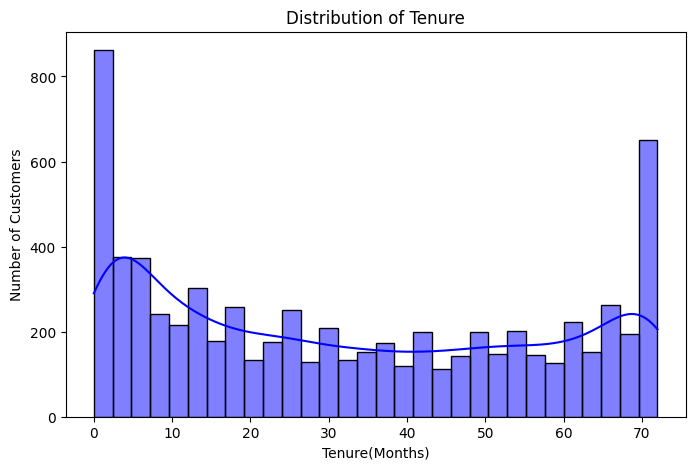

In [98]:
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, kde=True, color="blue")
plt.xlabel("Tenure(Months)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Tenure")
plt.show()

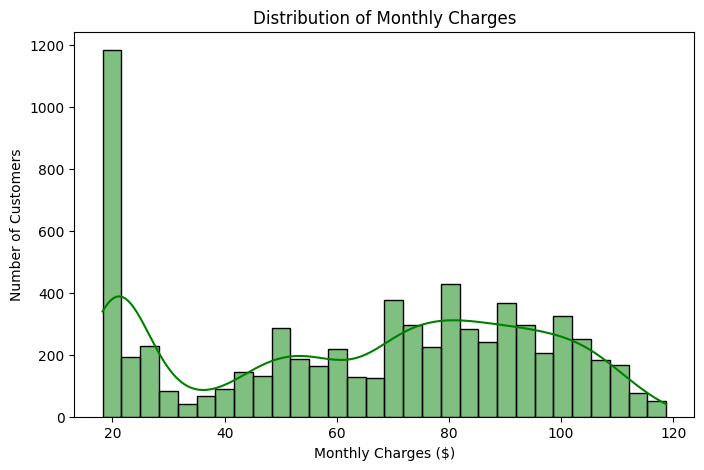

In [99]:
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="green")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Monthly Charges")
plt.show()

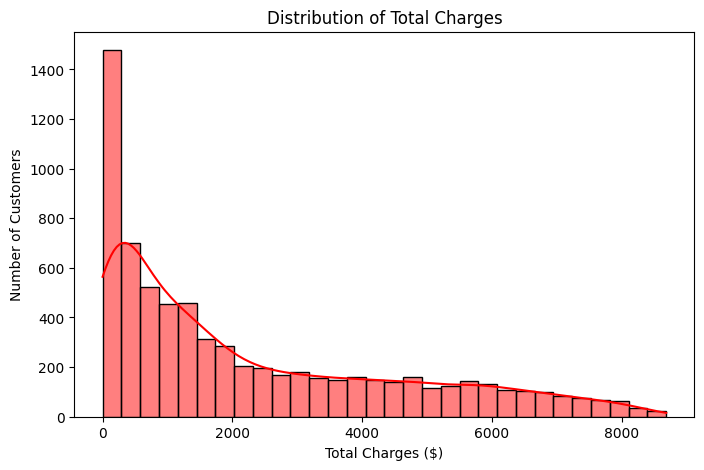

In [100]:
plt.figure(figsize=(8,5))
sns.histplot(df["TotalCharges"], bins=30, kde=True, color="red")
plt.xlabel("Total Charges ($)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Total Charges")
plt.show()


In [101]:
fig = px.histogram(df, x="tenure", color="Churn", barmode="group",
                   title="Churn Rate by tenure Type",
                   text_auto=True)

# Show the figure
fig.show()

In [102]:
fig = px.histogram(df, x="MonthlyCharges", color="Churn", barmode="group",
                   title="Churn Rate by Charges Type",
                   text_auto=True)

# Show the figure
fig.show()

In [103]:
fig = px.histogram(df, x="TotalCharges", color="Churn", barmode="group",
                   title="Churn Rate by TotalCharges Type",
                   text_auto=True)

# Show the figure
fig.show()

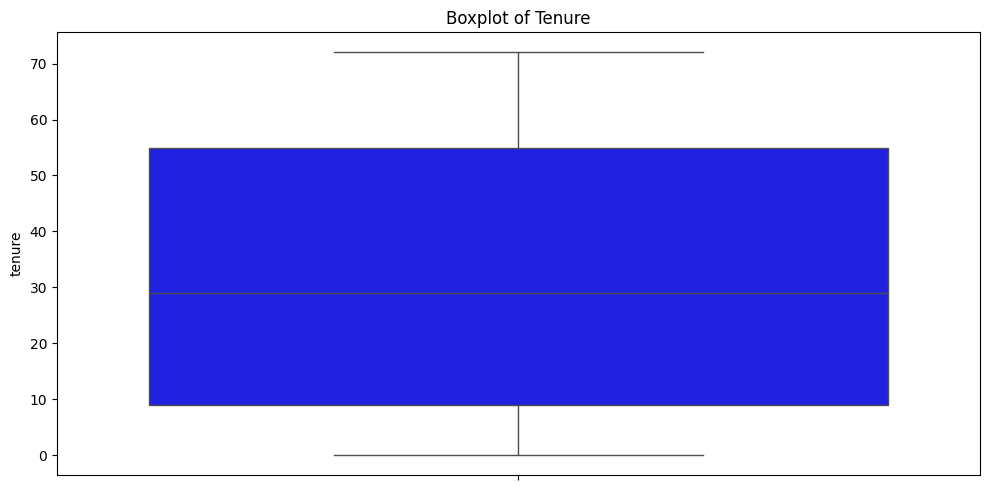

In [104]:
# Boxplots to detect outliers
fig, ax = plt.subplots( figsize=(10, 5))

sns.boxplot(y=df["tenure"], ax=ax, color="blue")
ax.set_title("Boxplot of Tenure")

plt.tight_layout()
plt.show()

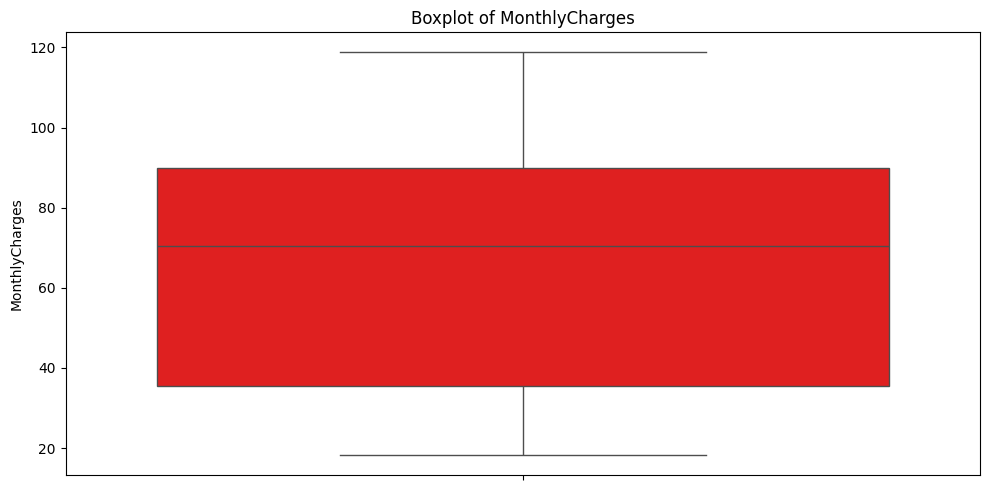

In [105]:
# Boxplots to detect outliers
fig, ax = plt.subplots( figsize=(10, 5))

sns.boxplot(y=df["MonthlyCharges"], ax=ax, color="red")
ax.set_title("Boxplot of MonthlyCharges")

plt.tight_layout()
plt.show()

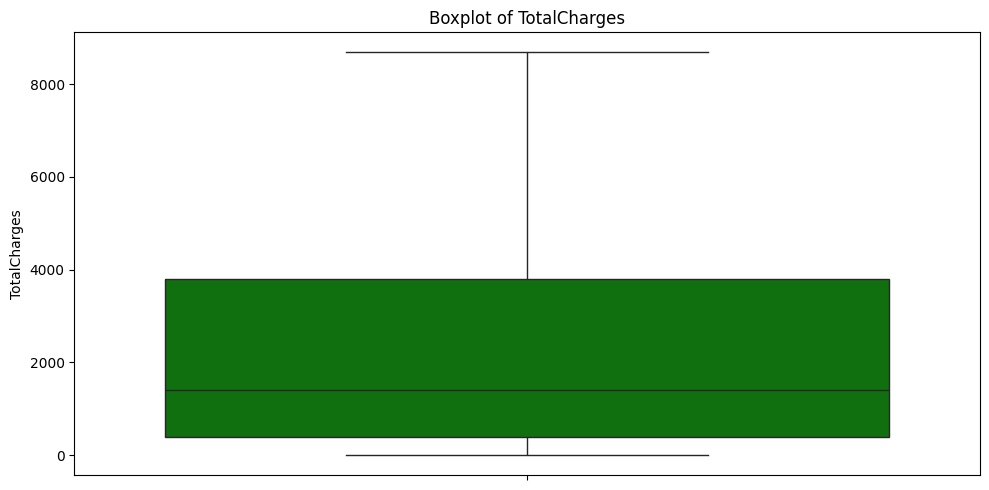

In [106]:
# Boxplots to detect outliers
fig, ax = plt.subplots( figsize=(10, 5))

sns.boxplot(y=df["TotalCharges"], ax=ax, color="green")
ax.set_title("Boxplot of TotalCharges")

plt.tight_layout()
plt.show()

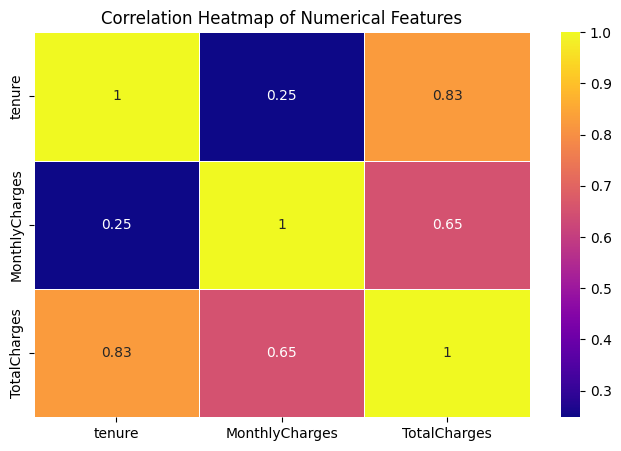

In [107]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="plasma", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [108]:
# Summary statistics for numerical features (excluding SeniorCitizen)
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


This was a numerical feature EDA where we can see how much money was paid by customer by monthly and totalcharges and also about tenure how many months customer use service and then churn.

Now, we will see categorical feature expolarity in this dataset.

In [109]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [111]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical feature
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



For more visualization i have to show why customer churn in categorical feature so there is 5 main reasons for that.
1. Internetservice
2. Techsupport
3. Contract
4. PaperlessBilling
5. PaymentMethod

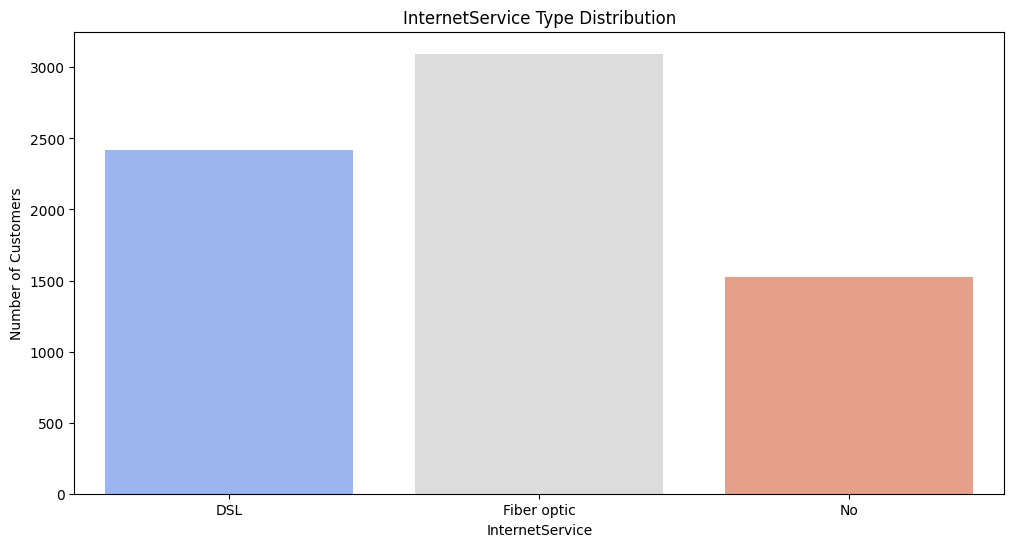

In [112]:
#1. Internet service
# Set up figure layout
plt.figure(figsize=(12, 6))

# Plot count of Contract Types
sns.countplot(x="InternetService", hue="InternetService", data=df, palette="coolwarm", dodge=False, legend=False)
plt.title("InternetService Type Distribution")
plt.xlabel("InternetService")
plt.ylabel("Number of Customers")
plt.show()

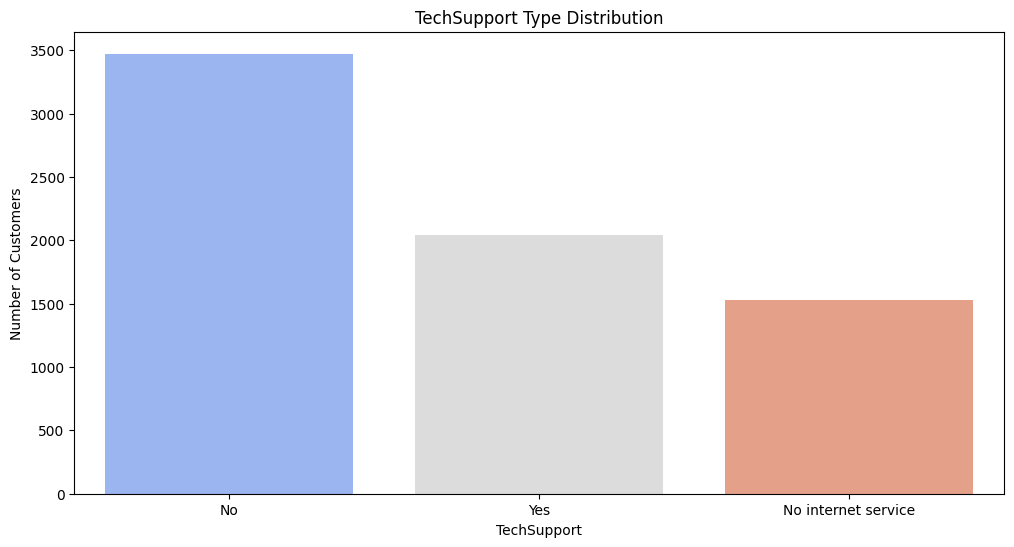

In [113]:
#2. TechSupport
# Set up figure layout
plt.figure(figsize=(12, 6))

# Plot count of Contract Types
sns.countplot(x="TechSupport", hue="TechSupport", data=df, palette="coolwarm", dodge=False, legend=False)
plt.title("TechSupport Type Distribution")
plt.xlabel("TechSupport")
plt.ylabel("Number of Customers")
plt.show()

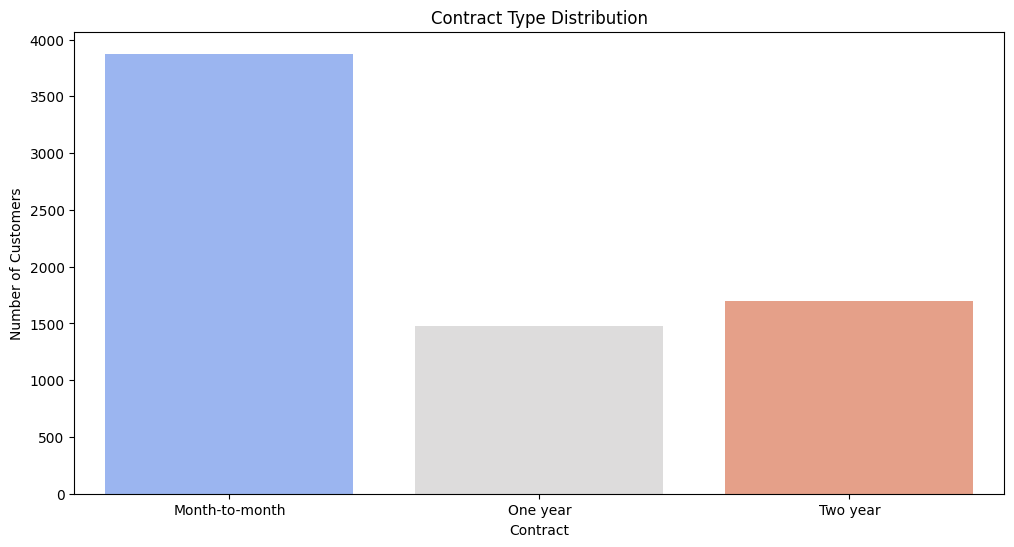

In [114]:
#3. Contract
# Set up figure layout
plt.figure(figsize=(12, 6))

# Plot count of Contract Types
sns.countplot(x="Contract", hue="Contract", data=df, palette="coolwarm", dodge=False, legend=False)
plt.title("Contract Type Distribution")
plt.xlabel("Contract")
plt.ylabel("Number of Customers")
plt.show()

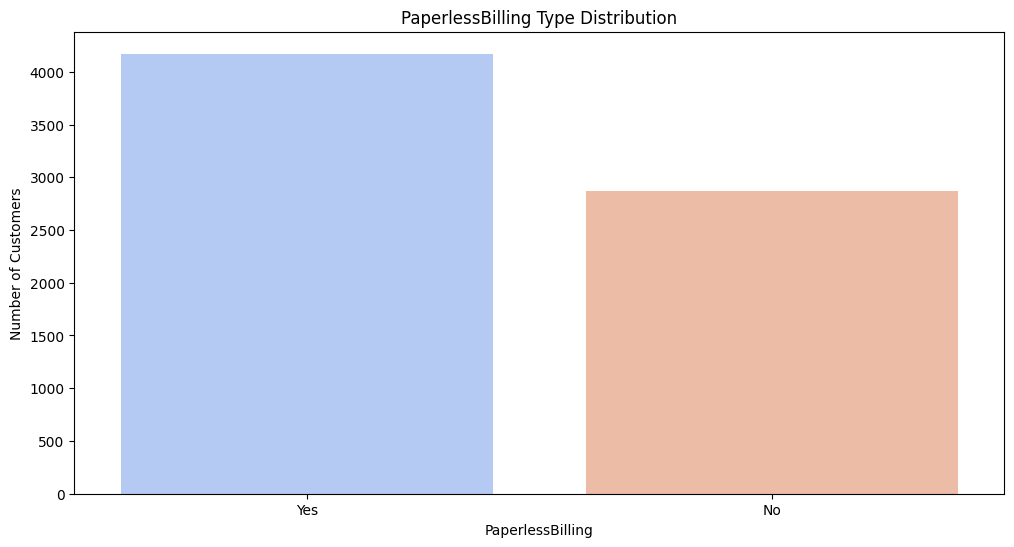

In [115]:
#4. PaperlessBilling
# Set up figure layout
plt.figure(figsize=(12, 6))

# Plot count of Contract Types
sns.countplot(x="PaperlessBilling", hue="PaperlessBilling", data=df, palette="coolwarm", dodge=False, legend=False)
plt.title("PaperlessBilling Type Distribution")
plt.xlabel("PaperlessBilling")
plt.ylabel("Number of Customers")
plt.show()

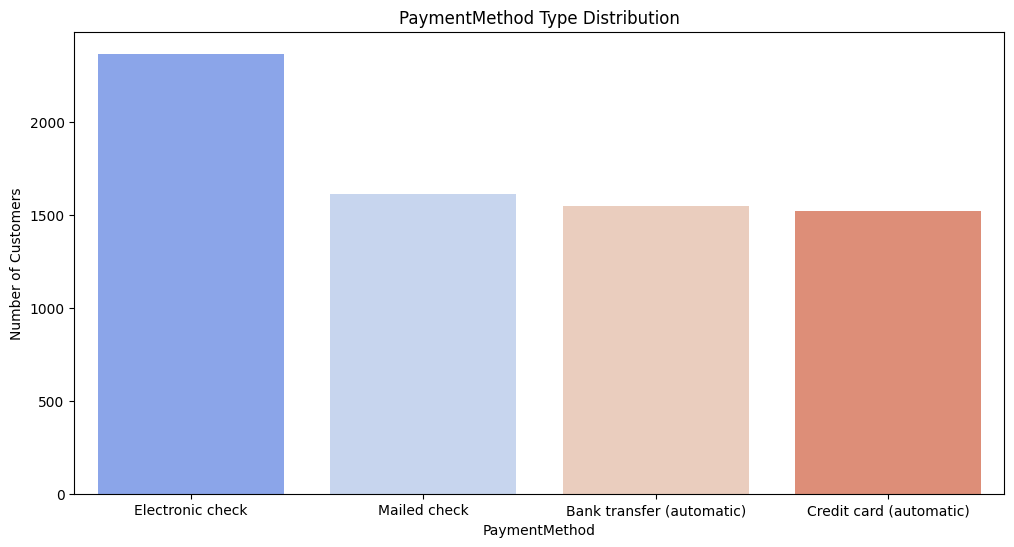

In [116]:
#5. PaymentMethod
# Set up figure layout
plt.figure(figsize=(12, 6))

# Plot count of Contract Types
sns.countplot(x="PaymentMethod", hue="PaymentMethod", data=df, palette="coolwarm", dodge=False, legend=False)
plt.title("PaymentMethod Type Distribution")
plt.xlabel("PaymentMethod")
plt.ylabel("Number of Customers")
plt.show()

This bar graph shows how many cutomers have selected services and the way they pay bills, contract type and etc.

Now we will see how many customers churn because of these services with the help of comparison between categorical features and churn.

In [117]:
fig = px.histogram(df, x="InternetService", color="Churn", barmode="group",
                   title="Churn Rate by Service Type",
                   text_auto=True)

# Show the figure
fig.show()

In [118]:
fig = px.histogram(df, x="TechSupport", color="Churn", barmode="group",
                   title="Churn Rate by Support Type",
                   text_auto=True)

# Show the figure
fig.show()

In [119]:
fig = px.histogram(df, x="Contract", color="Churn", barmode="group",
                   title="Churn Rate by Contract Type",
                   text_auto=True)

# Show the figure
fig.show()

In [120]:
fig = px.histogram(df, x="PaperlessBilling", color="Churn", barmode="group",
                   title="Churn Rate by Billing Type",
                   text_auto=True)

# Show the figure
fig.show()

In [121]:
fig = px.histogram(df, x="PaymentMethod", color="Churn", barmode="group",
                   title="Churn Rate by Payment Type",
                   text_auto=True)

# Show the figure
fig.show()

We performed Exploratory Data Analysis to understand why chustomer churn and numbers of customer churn due to some reasons.

Here is a short brief that what we have done in EDA.
1. Load the dataset and inspect all the column


*   Checked dataset: this dataset has 7043 rows and 21 columns.
*   Identified features: Numerical features and Categorical features
*   In this dataset we don't have any missing values except from total charges that we have fixed.
*   Find class imbalance in churn where we can see there are more "No" than "Yes".

2. Analyzed numerical features
*   Plot histogram for tenure, MonthlyCharges and TotalCharges
*   Comparison between how many customer churn based on numercial features in two groups YES and NO. Either user will stay or stop using thoes service.
*   Key finding:
  1. Many customer have short tenure (0-10 months) means high risk to churn.
  2. Mostly customer pays bill between (20-80$ monthly), but some users also pay more than 100$.
  3. TotalCharges is skewed.(Low value Domination)boxplots to detect outliers in charges & tenure

3. Analyzed Categorical feature
*   Check unique values in categorical features which are Internetservice,Techsupport,Contract,PaperlessBilling,PaymentMethod.
*   Plot bar charts to see customer distribution.
*   Month-to-month contracts have the highest churn.
*   Fiber optic users churn more than DSL users.
*   Electronic check users churn the most.

4. Explore Churn Pattern

*   Explore plotted bar chart with numerical features and Categorical features vs. Churn
*   Inside Churn pattern
    1. Customers with long-term contracts churn less
    2. Users with paperless billing churn more
    3. Users paying higher MonthlyCharges churn more

Now, let's start **Data Preprocessing**.

In this part we will do encoding in target column and categoricl columns.In the list we will data into two parts train data and test data and then we will train our models.

In [122]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [123]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

<ipython-input-123-b6eb27bc3ee0>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [124]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [125]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


**Label encoding of Categorical features**

In [126]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [127]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [128]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [129]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [130]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Now set the dataset into two parts train data and test data.

In [131]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [132]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
print(y_train.shape)

(5634,)


In [134]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [135]:
smote = SMOTE(random_state=42)

In [136]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [137]:
print(y_train_smote.shape)

(8276,)


In [138]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


After dividing dataset,it's time to train models in this project i choose 5 model which are **Logistic regression, Decision tree, K-Nearest Neighbour, Randomforest and Support Vector Machine(SVM**).

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [141]:
# Dictionary to store cross-validation results
cv_scores = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")

    # Use scaled features for models that need scaling
    if model_name in ["Logistic Regression", "SVM", "KNN"]:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    # Store accuracy scores
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.4f}")
    print("-" * 70)

Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy: 0.7987
----------------------------------------------------------------------
Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.7286
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.7911
----------------------------------------------------------------------
Training SVM with default parameters
SVM cross-validation accuracy: 0.7941
----------------------------------------------------------------------
Training KNN with default parameters
KNN cross-validation accuracy: 0.7519
----------------------------------------------------------------------


In [142]:
cv_results = pd.DataFrame({
    "Model": list(cv_scores.keys()),
    "Mean Accuracy": [np.mean(score) for score in cv_scores.values()]
})

# Create interactive bar chart
fig = px.bar(cv_results, x="Model", y="Mean Accuracy", text="Mean Accuracy",
             title="Cross-Validation Accuracy Scores of Models",
             color="Mean Accuracy", color_continuous_scale="blues")

# Customize hover labels
fig.update_traces(texttemplate="%{text:.4f}", textposition="outside", hoverinfo="x+y")

# Show the figure
fig.show()

In [143]:
# Dictionary to store evaluation metrics
evaluation_scores = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Use scaled features for models that need scaling
    if model_name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    evaluation_scores[model_name] = {"Precision": precision, "Recall": recall, "F1-Score": f1}

    # Print results
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 70)

Evaluating Logistic Regression...
Precision: 0.6771, Recall: 0.5791, F1-Score: 0.6243
----------------------------------------------------------------------
Evaluating Decision Tree...
Precision: 0.4820, Recall: 0.5013, F1-Score: 0.4915
----------------------------------------------------------------------
Evaluating Random Forest...
Precision: 0.6705, Recall: 0.4638, F1-Score: 0.5483
----------------------------------------------------------------------
Evaluating SVM...
Precision: 0.6850, Recall: 0.5013, F1-Score: 0.5789
----------------------------------------------------------------------
Evaluating KNN...
Precision: 0.5465, Recall: 0.5040, F1-Score: 0.5244
----------------------------------------------------------------------


In [144]:
# Convert evaluation results to DataFrame
eval_df = pd.DataFrame(evaluation_scores).T.reset_index().rename(columns={"index": "Model"})

# Melt DataFrame for Plotly visualization
eval_melted = eval_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create interactive grouped bar chart
fig = px.bar(eval_melted, x="Model", y="Score", color="Metric", barmode="group",
             title="Precision, Recall, and F1-Score for Each Model",
             text="Score", color_discrete_map={"Precision": "blue", "Recall": "green", "F1-Score": "red"})

# Customize hover labels
fig.update_traces(texttemplate="%{text:.4f}", textposition="outside", hoverinfo="x+y")

# Show figure
fig.show()

**Which model fits as a best model?**

1.  Best for overall balance(Accuracy + F1-score) is **Logistic Regression**

  *  Highest **accuracy (0.7987) and F1-score (0.6243)**.
  *  A good balance of precision and recall.
  *  Suitable if we want both churn prediction accuracy and fewer false positives/negatives.

2. Best for Precision (Fewer False Positives) → **SVM**

  *  Highest **Precision (0.6850)**, meaning it correctly identifies non-churners better.
  *  Second highest **accuracy (0.7941)** and decent F1-score.
  *  Good if the business wants to minimize wrong churn predictions.

3. Best for Recall (Identifying More Churners) → **Logistic Regression**

  *  Highest **recall (0.5791)**, mean it catches more actual churners.
  *  If the goal is to identify at-risk customers early, this is the best model.


Here i am choosing Logistic regression because it is best for overall balance.

1.  It has the highest **accuracy (0.7987)**.
2.  It has the **best balance of Precision, Recall, and F1-Score**.
3.  It is **fast and interpretable**, making it easy to understand for business insights.



In [145]:
# Define parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"],
    "penalty": ["l1", "l2"]
}

In [146]:
logreg = LogisticRegression(max_iter=500)

In [147]:
# GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)  # Use scaled data

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [148]:
# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8004970835349352


In [149]:
# Train final Logistic Regression model with best parameters
best_logreg = LogisticRegression(**grid_search.best_params_, max_iter=500)
best_logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=500, penalty='l1', solver='saga')

In [150]:
# Evaluate on test set
y_pred_best = best_logreg.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Test Set Accuracy: 0.8204400283889283
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



The Logistic Regression model has been successfully implemented using hypertunning. The accuracy score is also improved. Before implement model accuracy score was **0.7987** and after is become **0.82**. So now we are going to save this model as pickle file and load the model. After loading model will give some record to predict either customer churn or stay.

In [151]:
# Create a dictionary with the model and feature names
model_data = {"model": best_logreg, "feature_names": X.columns.tolist()}

# Save the model as a pickle file
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved successfully!")

Model saved successfully!


In [152]:
# Load the model from the pickle file
with open("customer_churn_model.pkl", "rb") as f:
    loaded_data = pickle.load(f)

# Extract model and feature names
loaded_model = loaded_data["model"]
feature_names = loaded_data["feature_names"]

print("Model loaded successfully!")
print("Feature Names:", feature_names)


Model loaded successfully!
Feature Names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [153]:
def predict_churn(customer_data):

    # Create DataFrame with feature names
    input_df = pd.DataFrame([customer_data])  # Create DataFrame from dictionary

    # Ensure input follows the correct feature order
    input_data = input_df[feature_names]

    # Apply feature scaling
    input_data_scaled = scaler.transform(input_data)

    # Ensure input follows the correct feature order
    input_data = np.array([customer_data[feature] for feature in feature_names]).reshape(1, -1)

    # Predict churn (1 = churn, 0 = no churn)
    prediction = loaded_model.predict(input_data_scaled)

    # Get prediction probability (Churn = 1)
    pred_prob = loaded_model.predict_proba(input_data_scaled)[0][1]

    # Results
    print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
    print(f"Prediction Probability: {pred_prob:.4f}")

# Example input (replace values with real customer data)
sample_customer = {
    "gender": 0, "SeniorCitizen": 1, "Partner": 0, "Dependents": 0, "tenure": 34,
    "PhoneService": 0, "MultipleLines": 1, "InternetService": 2, "OnlineSecurity": 0,
    "OnlineBackup": 1, "DeviceProtection": 1, "TechSupport": 0, "StreamingTV": 1,
    "StreamingMovies": 2, "Contract": 1, "PaperlessBilling": 1, "PaymentMethod": 1,
    "MonthlyCharges": 70.50, "TotalCharges": 2000.00
}

# Make a prediction
predict_churn(sample_customer)

Prediction: No Churn
Prediction Probability: 0.4937


Here, i have improved model and also deploy model using saving and load model. Also i add one record and see either customer will churn or no with predition probability.

**In Model Improvement(Hyperparameter tunning)**

Optimized the logistic regression using GridSearchCV to tune:
1. Regularization Strength(C)
2. Solver(liblinear, saga)
3. Penalty (l1,l2)

Improved the model performance on test data.

**Model Deployment**

I have save the trained model as .pkl file for future use and also load the saved model to ensure prediction is completely working or not. And in the last feature names were saved to ensure correct input formatting.

**Predictive System: Making Prediction**

I have build a function to predict churn for new customers and also displayed the churn prediction ("Churn" or "No Churn") and also Prediction Probability.

**Future Scope(Engineering)**

**1. Improve Model Performance**

*   **Feature Engineering**
  1.   Create new features like customer intereaction frequncy, discount history, and  customer complaints.
  2.   Used time based features like "Months since last contract change".

*   **Try More Advanced Model**

  1.   Use XGBoost and LightBGM for more better handling of more large datasets.
  2.   Deep learning (Neural Network) for more complacity customer behaviour analysis.

* **Hyperparameter Tunning for all models:**

  1.   In this project we only tunned Logistic regression.
  2.   Tune Random Forest, SVM, and KNN using GridSearchCV or Bayesian Optimization.

**2. Enhance data quality**

*  **Collect more data**
  1. Including more customer support data interaction with more feature.
  2. Use more user sentiment analysis from customer feedback reviews.
  3. Add external data sources like compititor's pricing and addpting the market trends.

* **Handle Imbalanced Data More Effectively**
  1. We can use ensemble methods like Balanced Random Forest instead of SMOTE.
  2. Use cost-sensitive learing, where the model penalized miss classification of churns more.

**3. Real-Time churn Prediction System**

* **Deploy as a web site or API**
  1. Use flask, FastAPI, or Stramlit to create a real time prediciton system which is more interactive.
  2. Allow businesses to enter customer details and get Instant churn predicitons.

* **Automate Model training with New data:**

  1. Use MLOp to automatical retrain the model when new customers data arrives.
  2. Schedule update every month or quarter for improve model accuracy.

* **Integrate with a CRM System:**

  1. Connect this model with Salesforce, HubSpot, or other CRM tool to provide real-time churn alerts.
  2. Sales teams can be notified when a high-risk customer is detected.


**Conclusion & Business Recommodations**

1. **Final Findings:**
  * Customers with month-to-month contracts & high monthly charges are more likely to churn.
  * Customers using electronic check payments have higher churn.
  * Customers with longer tenure & annual contracts churn less.

2. **Business Recommendations:**
  * Offer discounts to customers with high churn risk (high charges, short tenure).
  * Encourage long-term contracts by providing loyalty incentives.
  * Improve customer support for fiber optic users to reduce churn.
  * Send targeted promotions to electronic check users to switch to auto-pay methods.